# Text Generation with Recurrent Neural Networks (RNNs)

In this assignment, you'll build upon your understanding of RNNs and Keras to develop a word-level text generation model.  Your goal is to train a model that learns the stylistic nuances of a chosen corpus and generates new, original text segments that echo the source material's essence.

**Datasets**

We've provided several intriguing text corpora to get you started:

*   Mark Twain
*   Charles Dickens
*   William Shakespeare

**Feel free to explore!**  If you have a particular passion for another author, genre, or a specific text, you're encouraged to use your own dataset of raw text.

In [1]:
# Check if we have a GPU available
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.")

No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.


In [2]:
def download_file(url, file_path):
    import requests
    r = requests.get(url)
    with open(file_path, 'wb') as f:
        f.write(r.content)

def load_dataset(file_path, fraction=1.0):
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_text = f.read()
    return raw_text[:int(fraction * len(raw_text))]

dataset = 'mark_twain.txt' # Other options are shakespeare.txt, charles_dickens.txt

download_file(f'https://raw.githubusercontent.com/UofT-DSI/deep_learning/refs/heads/main/02_activities/assignments/downloaded_books/' + dataset, dataset)

# Load chosen dataset. NOTE: If Colab is running out of memory, change the `fraction` parameter to a value between 0 and 1 to load less data.
text = load_dataset(dataset, fraction=0.1)

# 1. Data Preparation (Complete or Incomplete)

Before we can begin training an RNN model, we need to prepare the dataset. This involves cleaning the text, tokenizing words, and creating sequences the model can be trained on.

## 1.1 Data Exploration

Print the first 1000 characters of the dataset. Report the dataset's size and the number of unique characters it contains.

In [3]:
print("The first 1000 characters:\n")
print(text[:1000])

print(f"Dataset's size: {len(text)}")

print(f"Number of unique characters: {len(set(text))}")

The first 1000 characters:


The Project Gutenberg EBook of The Prince and The Pauper, Complete by
Mark Twain (Samuel Clemens)

This eBook is for the use of anyone anywhere at no cost and with almost
no restrictions whatsoever. You may copy it, give it away or re-use
it under the terms of the Project Gutenberg License included with this
eBook or online at www.gutenberg.org

Title: The Prince and The Pauper, Complete

Author: Mark Twain (Samuel Clemens)

Release Date: August 20, 2006 [EBook #1837]
Last Updated: February 19, 2018

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK PRINCE AND THE PAUPER ***

Produced by David Widger. The earliest PG edition was prepared by Les
Bowler




THE PRINCE AND THE PAUPER

by Mark Twain

The Great Seal

I will set down a tale as it was told to me by one who had it of his
father, which latter had it of HIS father, this last having in like
manner had it of HIS father--and so on, back and still back, three
hun

## 1.2 Text Pre-Processing

To prepare the dataset for training, we need to clean the text and create a numerical representation the model can interpret. Perform the following pre-processing steps:

*   Convert the entire text to lowercase.
*   Use the `Tokenizer` class from the `keras.preprocessing.text` module to tokenize the text. You should fit the tokenizer on the text and then convert the text to a sequence of numbers. You can use the `texts_to_sequences` method to do this.

**Note**:
* You'll need to specify an appropriate size for the vocabulary. The number of words in the list of most common words can serve as a guide - does it seem like a reasonable vocabulary size?
* Some of the words will be excluded from the vocabulary, as they don't appear often enough. It's important to provide a value for `oov_token` when creating the Tokenizer instance, so that these words can be represented as "unknown".

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = text.lower()

VOCAB_SIZE = 5000 # number of the most common words
OOV_TOKEN = '<OOV>'

tokenizer = Tokenizer(num_words=VOCAB_SIZE, char_level=False, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts([text])
sequences = tokenizer.texts_to_sequences([text])

If everything worked, the following line should show you the first 10 words in the vocabulary:

In [5]:
try:
    print(list(tokenizer.word_index.items())[:10])
except AttributeError:
    print("Tokenizer has not been initialized. Possible issue: Complete the relevant section of the assignment to initialize it."
)

[('<OOV>', 1), ('the', 2), ('and', 3), ('of', 4), ('a', 5), ('to', 6), ('in', 7), ('was', 8), ('he', 9), ('it', 10)]


## 1.3 Sequence Generation

Now that the text has been tokenized, we need to create sequences the model can be trained on. There are two parts to this:

*   Use the `texts_to_sequences` method from the tokenizer to convert the text to a list of sequences of numbers.
*   Generate the training sequences. Each training sequence should contain `SEQ_LENGTH` token IDs from the text. The target token for each sequence should be the word that follows the sequence in the text.

In [6]:
import numpy as np
SEQ_LENGTH = 250 # Choose an appropriate sequence length

# Convert the text to a list of sequences of numbers - IM: it was already done above, sequences variable is defined

token_ids = [token for sequence in sequences for token in sequence]

# Generate the training sequences
X = []
y = []

for i in range(len(token_ids) - SEQ_LENGTH):
    # The input sequence of SEQ_LENGTH tokens
    X.append(token_ids[i:i + SEQ_LENGTH])
    # The target token that follows the input sequence
    y.append(token_ids[i + SEQ_LENGTH])

X = np.array(X)
y = np.array(y)

Assuming your sequences are stored in `X` and the corresponding targets in `y`, the following line should print the first training sequence and its target:

In [7]:
if len(X) > 0 and len(y) > 0:
    print(f'Sequence: {X[0]}\nTarget: {y[0]}')
    print(f'Translated back to words: {[tokenizer.index_word[i] for i in X[0]]} -> {tokenizer.index_word[y[0]]}')
else:
    print("Training sequences have not been generated. Possible issue: Complete the relevant section of the assignment to initialize it.")


Sequence: [   2  163  151  929    4    2   84    3    2  627 1216   24  582  776
 2261 2747   22  929   20   16    2  327    4 1866 1443   23   46  826
    3   14  318   46 3108 2513   28  154  930   10  248   10   86   36
 2514  327   10  157    2  518    4    2  163  151  628 2515   14   22
  929   36 2516   23 1867  151  931  893    2   84    3    2  627 1216
 4511  582  776 2261 2747 2517 1969 1733 2120    1  929 2518  117 4030
 2121 4512    1 1522  353 1164  218    1    1 1106  672    4   22  163
  151  929   84    3    2  627 1444   24 3109 4031    2 3395 3110 3111
    8 1734   24 4513 4514    2   84    3    2  627   24  582  776    2
   96  365   13   52  218   66    5 1217   25   10    8  402    6   35
   24   40   75   21   10    4   11  211   53 1359   21   10    4   11
  211   22  117  454    7  114  827   21   10    4   11  211    3   31
   27  106    3  122  106  165  158  176    3   70    2 3396    1   10
    6    2 2122    3   31    1   10  234  154   26  436   10  154  

And the following code will transform y into a one-hot encoded matrix, and split everything into training and validation sets:

In [8]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

# Ensure that tokenizer has been initialized
if tokenizer is not None:
    # Convert X and y to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # One last thing: let's drop any examples where the target is the OOV token - we don't want our model to predict that (boring!)
    if OOV_TOKEN in tokenizer.word_index:
        mask = y != tokenizer.word_index[OOV_TOKEN]
        X = X[mask]
        y = y[mask]

    # One-hot encode the target token
    y = to_categorical(y, num_classes=VOCAB_SIZE)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f'X_train shape: {X_train.shape}')
    print(f'y_train shape: {y_train.shape}')
else:
    print("Tokenizer has not been initialized. Please initialize it and load the vocabulary before continuing.")


X_train shape: (171465, 250)
y_train shape: (171465, 5000)


# 2. Model Development (Complete or Incomplete)

With the dataset prepared, it's time to develop the RNN model. You'll need to define the architecture of the model, compile it, and prepare it for training.

## 2.1 Model Architecture

Define the architecture of your RNN model. You can design it however you like, but there are a few features that it's important to include:

*   An embedding layer that learns a dense representation of the input tokens. You'll need to specify the input dimension (the size of the vocabulary) and the output dimension (the size of the dense representation). Remember, you can look at the documentation [here](https://keras.io/api/layers/core_layers/embedding/).
*   At least one recurrent layer. We have learned how to use LSTM layers in class, but you can use other types of recurrent layers if you prefer. You can find the documentation [here](https://keras.io/api/layers/recurrent_layers/lstm/).
*   A dense layer with a softmax activation function. This layer will output a probability distribution over the vocabulary, so that the model can make predictions about the next token.

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

EMBEDDING_DIM = 50
N_CLASSES = VOCAB_SIZE

model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, trainable=True),
    LSTM(100),
    Dense(N_CLASSES, activation='softmax')
])

# Check if the model has layers before trying to print the summary
if len(model.layers) > 0:
    model.summary()
else:
    print("No layers have been added to the model. Please complete the assignment by adding the required layers.")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          250000    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 5000)              505000    
                                                                 
Total params: 815,400
Trainable params: 815,400
Non-trainable params: 0
_________________________________________________________________


## 2.2 Model Compilation

Compile the model with an appropriate loss function and optimizer. You might also want to track additional metrics, such as accuracy.

Give a short explanation of your choice of loss function and optimizer:

_I decided to use categorical_crossentropy as a loss function as our targets are one-hot encoded vectors rather than integers.
Adam is one of the most popular and efficient optimizers. It uses less memory and efficient enough to be used for large-scale problems as our task._

In [10]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc']
)

## 2.3 Model Training

Train the model on the training data you've prepared.

* Train your model for 5 epochs with a batch size of 128. Use the validation data for validation.
* Store the training history in a variable called `history`.

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=128)

Epoch 1/5
1340/1340 [==============================] - 460s 341ms/step - loss: 6.3743 - acc: 0.0744 - val_loss: 6.0915 - val_acc: 0.0986
Epoch 2/5
1340/1340 [==============================] - 384s 287ms/step - loss: 5.9156 - acc: 0.1085 - val_loss: 5.8115 - val_acc: 0.1155
Epoch 3/5
1340/1340 [==============================] - 358s 267ms/step - loss: 5.6380 - acc: 0.1236 - val_loss: 5.6159 - val_acc: 0.1266
Epoch 4/5
1340/1340 [==============================] - 355s 265ms/step - loss: 5.4165 - acc: 0.1352 - val_loss: 5.4755 - val_acc: 0.1357
Epoch 5/5
1340/1340 [==============================] - 481s 359ms/step - loss: 5.2317 - acc: 0.1455 - val_loss: 5.3738 - val_acc: 0.1405


Plot the training history to visualize the model's learning progress. Your plot should include the training and validation loss.

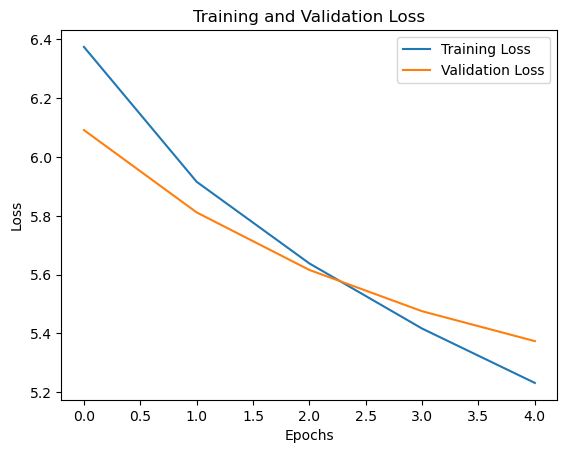

In [19]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plot
plt.show()

# 3. Text Generation (Complete or Incomplete)

Write a method called `generate_text` that uses the trained model to generate new text. The method should take the following parameters:

*   `model`: The trained RNN model.
*   `tokenizer`: The tokenizer used to pre-process the text data.
*   `seed_text`: The seed text the model will use to generate new text.
*   `max_sequence_len`: The maximum length of the sequence used to generate new text.

The method should return the generated text.

An overview of the text generation process you should follow:

1. Tokenize the seed text using the tokenizer we built before.
2. Pad the sequences to the same length as the training sequences - you can use the `pad_sequences` method from the `keras.preprocessing.sequence` module, which is documented [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences).
3. Use the model to predict the next token in the sequence. Remember that the model will output a probability distribution over the vocabulary, so you'll need to use `np.argmax` to find the token with the highest probability.
4. Add the predicted token to the sequence and remove the first token.
5. Repeat steps 3-4 until you have generated the desired number of tokens.
6. Convert the generated token IDs back to words and return the combined result as a single string.

This is a challenging task, so don't hesitate to ask for help if you need it. It's okay if the generated text doesn't make much sense yet - we'll work on improving the model next.
As a bonus, you can make your method generate "gpt-style" by having it print out each word as it's generated, so you can see the text being generated in real time.

In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_predicted_word(model, sequence):
    """
    Get the predicted word from the model.
    This helper function uses a concept we haven't covered in class yet: temperature.
    In essence, a little bit of randomness in what word we predict can make the text more interesting.
    """

    # Use the model to predict the next token in the sequence
    yhat = model.predict(sequence, verbose=0)

    # Get the index of the predicted word, according to the probabilities
    yhat = np.random.choice(range(VOCAB_SIZE), p=yhat.ravel())

    return yhat

def generate_text(model, tokenizer, seed_text, max_sequence_len):
    """
    Generate new text using the trained model.
    You can use the `get_predicted_word` helper function to help you with this.
    """
    # Tokenize the seed text
    tokenized_seed = tokenizer.texts_to_sequences([seed_text])
    
    # Pad the sequence to the same length as the training sequences
    padded_seed = pad_sequences(tokenized_seed, maxlen=max_sequence_len, padding='pre')
    
    # Initialize the generated text with the seed text
    generated_text = seed_text
    
    # Generate the text
    for _ in range(20):
        # Get the predicted word using the helper function
        predicted_token = get_predicted_word(model, padded_seed)
        
        # Convert the predicted token back to a word
        predicted_word = tokenizer.index_word.get(predicted_token, '')

        # Append the predicted word to the generated text
        generated_text += ' ' + predicted_word
        
        # Update the seed text by adding the predicted word and removing the first token
        tokenized_seed[0].append(predicted_token)
        tokenized_seed[0] = tokenized_seed[0][1:]
        
        # Re-pad the sequence to maintain the fixed length
        padded_seed = pad_sequences(tokenized_seed, maxlen=max_sequence_len, padding='pre')
    
    return generated_text


In [41]:
# Test the text generation function
generate_text(model, tokenizer, 'mississippi', SEQ_LENGTH)

"mississippi the physicians by of madam and a wouldn't was life but her rise footnote lightning \xa0hark out he would tell"

It's likely that the text generated by your model doesn't make much sense yet. This is because the model hasn't been trained for very long, and the training dataset is relatively small. 

# 4. Model Refinement (Complete or Incomplete)

In this last section, you'll work on improving your model. There are many ways to do this, but here are a few ideas to get you started:

* Use pre-trained embeddings: the code below will help you to load pre-trained embeddings through Keras. 
* Experiment with different model architectures, including the number of layers, the number of units in each layer, and the use of dropout layers.
* Train your model for longer. You can also experiment with different batch sizes.

Implement and test out at least one of these ideas. If you have other ideas for improving the model, feel free to try them out as well.

In [42]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find or open glove.6B.zip, glove.6B.zip.zip or glove.6B.zip.ZIP.


In [58]:
# Load the pre-trained embeddings
embeddings_index = {}
try:
    with open('glove.6B.100d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f'Found {len(embeddings_index)} word vectors.')
except FileNotFoundError:
    print("'glove.6B.100d.txt' File not found. Please make sure you have ran the previous cell.")

Found 400000 word vectors.


In [77]:
# Check if VOCAB_SIZE is set
if VOCAB_SIZE is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    # Create an embedding matrix
    embedding_matrix = np.zeros((VOCAB_SIZE, 100))
    for word, i in tokenizer.word_index.items():
        if i < VOCAB_SIZE:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

In [78]:
# Check if VOCAB_SIZE is set
if VOCAB_SIZE is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    embedding_layer = Embedding(
        VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=SEQ_LENGTH, trainable=False
    )

In [81]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.optimizers import Adam

# Define a new model and train it
model = Sequential([
    # Add the pre-defined and pre-trained embedding layer
    embedding_layer,
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(100, return_sequences=False),
    Dropout(0.5),
    Dense(N_CLASSES, activation='softmax')
])

# Set the embedding layer's trainable attribute to False to not fine-tune the embeddings - you can try to change this
model.layers[0].trainable = False

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 250, 100)          500000    
                                                                 
 conv1d_28 (Conv1D)          (None, 248, 128)          38528     
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 124, 128)         0         
 g1D)                                                            
                                                                 
 conv1d_29 (Conv1D)          (None, 120, 64)           41024     
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 60, 64)           0         
 g1D)                                                            
                                                                 
 lstm_12 (LSTM)              (None, 100)             

In [82]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=128)

Epoch 1/5
1340/1340 [==============================] - 218s 161ms/step - loss: 6.6553 - accuracy: 0.0613 - val_loss: 6.4928 - val_accuracy: 0.0611
Epoch 2/5
1340/1340 [==============================] - 201s 150ms/step - loss: 6.5244 - accuracy: 0.0624 - val_loss: 6.4056 - val_accuracy: 0.0611
Epoch 3/5
1340/1340 [==============================] - 197s 147ms/step - loss: 6.3692 - accuracy: 0.0654 - val_loss: 6.2672 - val_accuracy: 0.0699
Epoch 4/5
1340/1340 [==============================] - 211s 158ms/step - loss: 6.2193 - accuracy: 0.0728 - val_loss: 6.1457 - val_accuracy: 0.0767
Epoch 5/5
1340/1340 [==============================] - 203s 151ms/step - loss: 6.0953 - accuracy: 0.0777 - val_loss: 6.0628 - val_accuracy: 0.0767


In [83]:
generate_text(model, tokenizer, 'mississippi', SEQ_LENGTH)

'mississippi concerning death a father make for goodwife do i poison ” than dismay said something him me away pass before'

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨**Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)**🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.